<a href="https://colab.research.google.com/github/FilipBogosel/Data-Analysis/blob/main/COVID19_cases_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing Covid cases CSV file using pandas and matplotlib**

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

print(f"Initial Data frame shape: {df.shape}")
print("Column names:", df.columns[:20])  # Show first 20 column names to understand structure
print(df.head())


Initial Data frame shape: (289, 1147)
Column names: Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20'],
      dtype='object')
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  3344

# **Using melt to make the data frame more accesible**

In [20]:
melted_df = pd.melt(df,
                    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                    var_name='Date',
                    value_name='Confirmed')

print("Melted DataFrame shape:", melted_df.shape)
print("Melted DataFrame sample:")
print(melted_df.head())  # .head() shows the first 5 rows of the DataFrame
print(f"Melted Data frame shape: {melted_df.shape}")

Melted DataFrame shape: (330327, 6)
Melted DataFrame sample:
  Province/State Country/Region       Lat       Long     Date  Confirmed
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0
Melted Data frame shape: (330327, 6)


# 1. First we'll do a global analysis

In [40]:
melted_df["Date"] = pd.to_datetime(melted_df["Date"], format = "%m/%d/%y")#transform the date column to datetime
global_cases = melted_df.groupby('Date')["Confirmed"].sum().reset_index()
print(global_cases.tail())

           Date  Confirmed
1138 2023-03-05  676024901
1139 2023-03-06  676082941
1140 2023-03-07  676213378
1141 2023-03-08  676392824
1142 2023-03-09  676570149


# Section that creates a plot with the total number fo confirmed cases globaly at each date

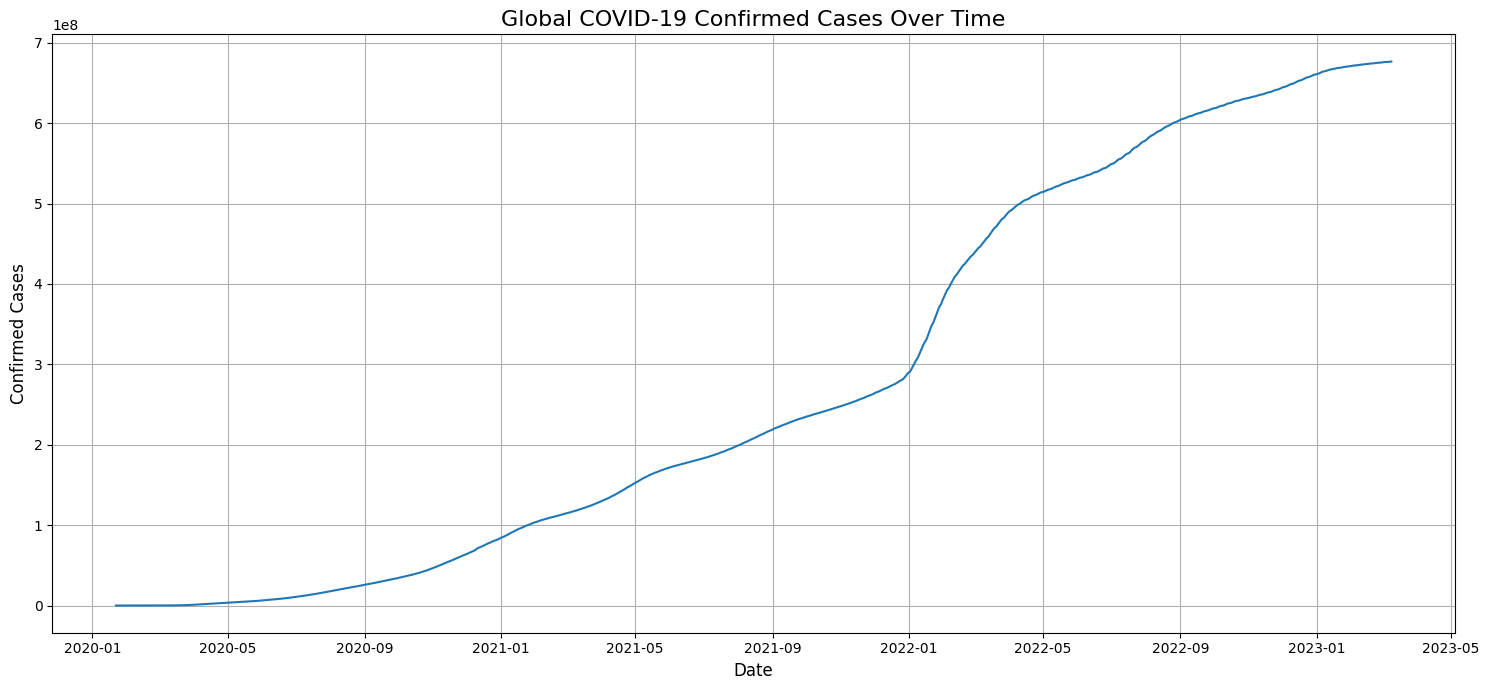

In [17]:

plt.figure(figsize=(15, 7))
# Create the line plot with dates on x-axis and case counts on y-axis
# plt.plot() creates a line chart with specified x and y values
plt.plot(global_cases['Date'], global_cases['Confirmed'])

# Add labels and title to make the chart more informative
plt.title('Global COVID-19 Confirmed Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)

# Add a grid to make the chart easier to read
plt.grid(True, linestyle='-', alpha=1.0)

# Improve layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()

# Chart to vizualise the daily growth of confirmed cases in time

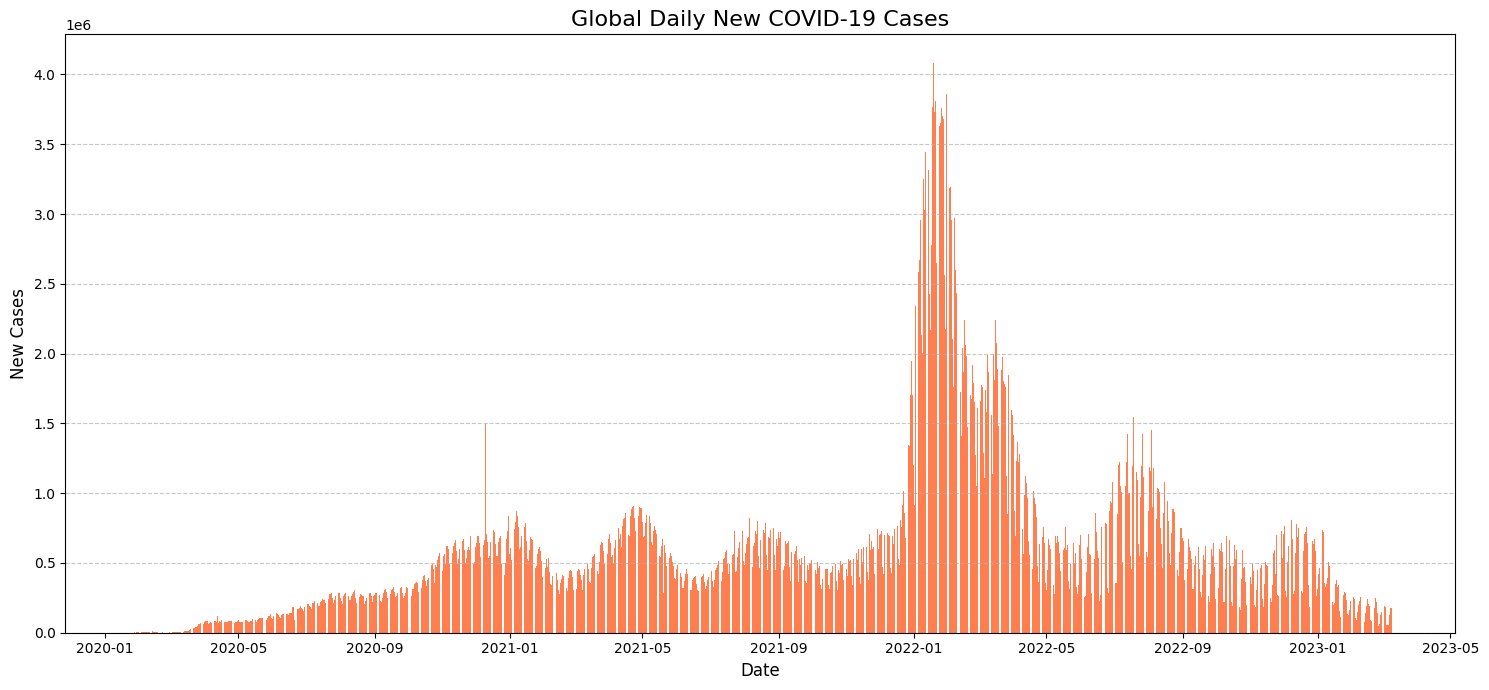

In [38]:
# Calculate and plot daily new cases (difference between consecutive days)
# .diff() calculates the difference between consecutive values
global_cases['New_Cases'] = global_cases['Confirmed'].diff()

plt.figure(figsize=(15, 7))
plt.bar(global_cases['Date'], global_cases['New_Cases'], color='coral')
plt.title('Global Daily New COVID-19 Cases', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **2. Secondly we'll do a country analysis**

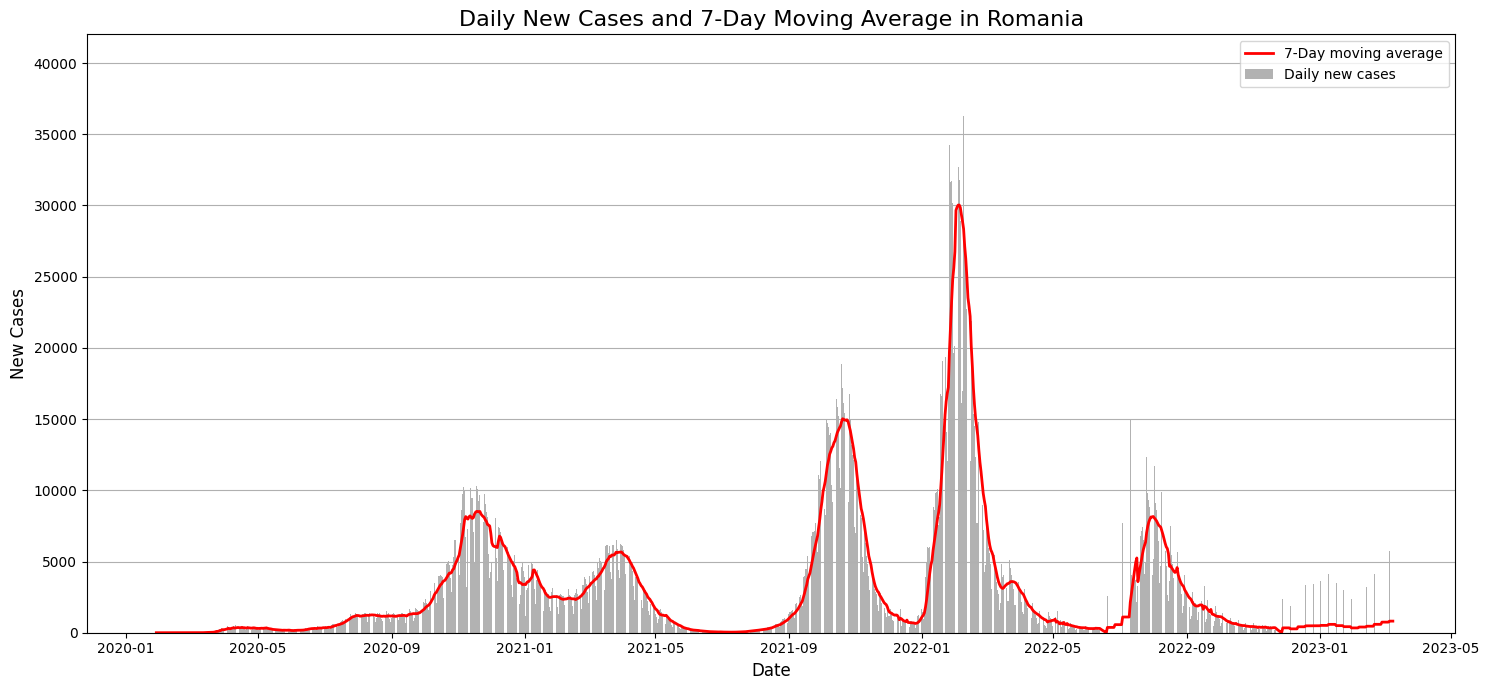

In [41]:
country_name = "Romania"
country_data = melted_df[melted_df["Country/Region"] == country_name]
#country_data = country_data.groupby('Date')['Confirmed'].sum().reset_index()
new_cases = country_data["Confirmed"].diff()
#Calculate 7 day moving average
avg_7days = new_cases.rolling(window=7).mean()
plt.figure(figsize=(15, 7))
plt.bar(country_data["Date"], new_cases,alpha=0.3,color='black',label = "Daily new cases")
plt.plot(country_data["Date"], avg_7days, color= 'red', linewidth = 2, label='7-Day moving average')
plt.title(f"Daily New Cases and 7-Day Moving Average in {country_name}", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("New Cases", fontsize=12)
plt.grid(True, axis = 'y', linestyle = '-', alpha = 1.0)
plt.legend()
plt.tight_layout()
plt.show()

# 3. We'll make a top countries report

  Country/Region  Total_Cases
0    Afghanistan       209451
1        Albania       334457
2        Algeria       271496
3        Andorra        47890
4         Angola       105288


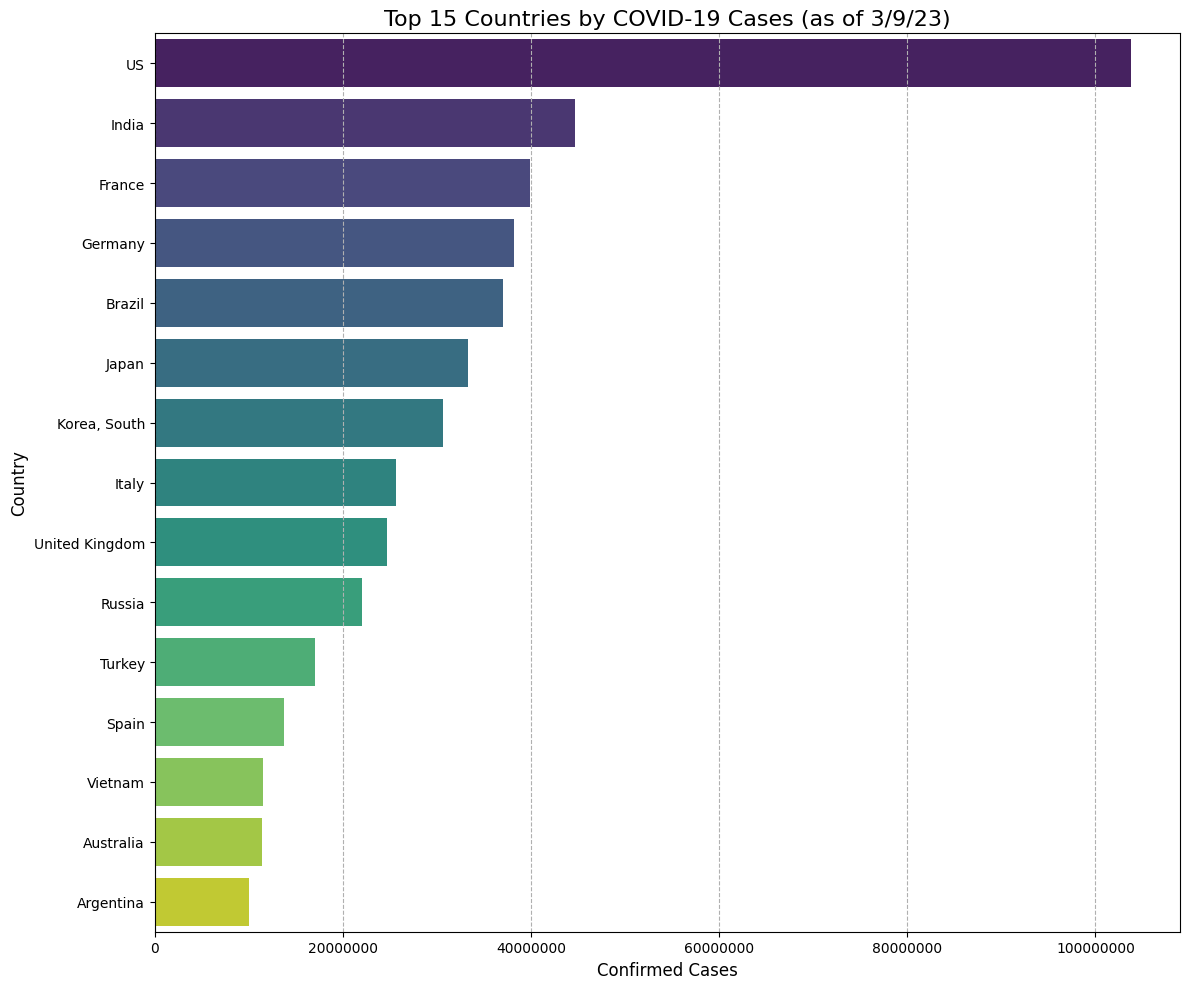

In [52]:
import seaborn as sns
# Compare top countries by total cases

# Get the latest date in the dataset
latest_date = df.columns[-1]  # Gets the last column name, which should be the most recent date

# Group by country and sum all provinces/states for each country
country_totals = df.groupby('Country/Region')[latest_date].sum().reset_index()

# Rename column for clarity
country_totals = country_totals.rename(columns={latest_date: 'Total_Cases'})
print(country_totals.head())
# Sort countries by total cases in descending order
country_totals = country_totals.sort_values('Total_Cases', ascending=False)

# Get top 15 countries
top_countries = country_totals.head(15)

# Create horizontal bar chart
plt.figure(figsize=(12, 10))

# Create the horizontal bar chart
# Horizontal bars are more readable for country names
# barh = horizontal bar chart
sns.barplot(x='Total_Cases', y='Country/Region',hue='Country/Region', data=top_countries, palette='viridis',legend=False)
plt.title(f'Top 15 Countries by COVID-19 Cases (as of {latest_date})', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')  # Don't use scientific notation for numbers
plt.grid(True, axis='x', linestyle='--', alpha=1.0)
plt.tight_layout()
plt.show()

# **4. Calculating Moving Averages for Trend Analysis**

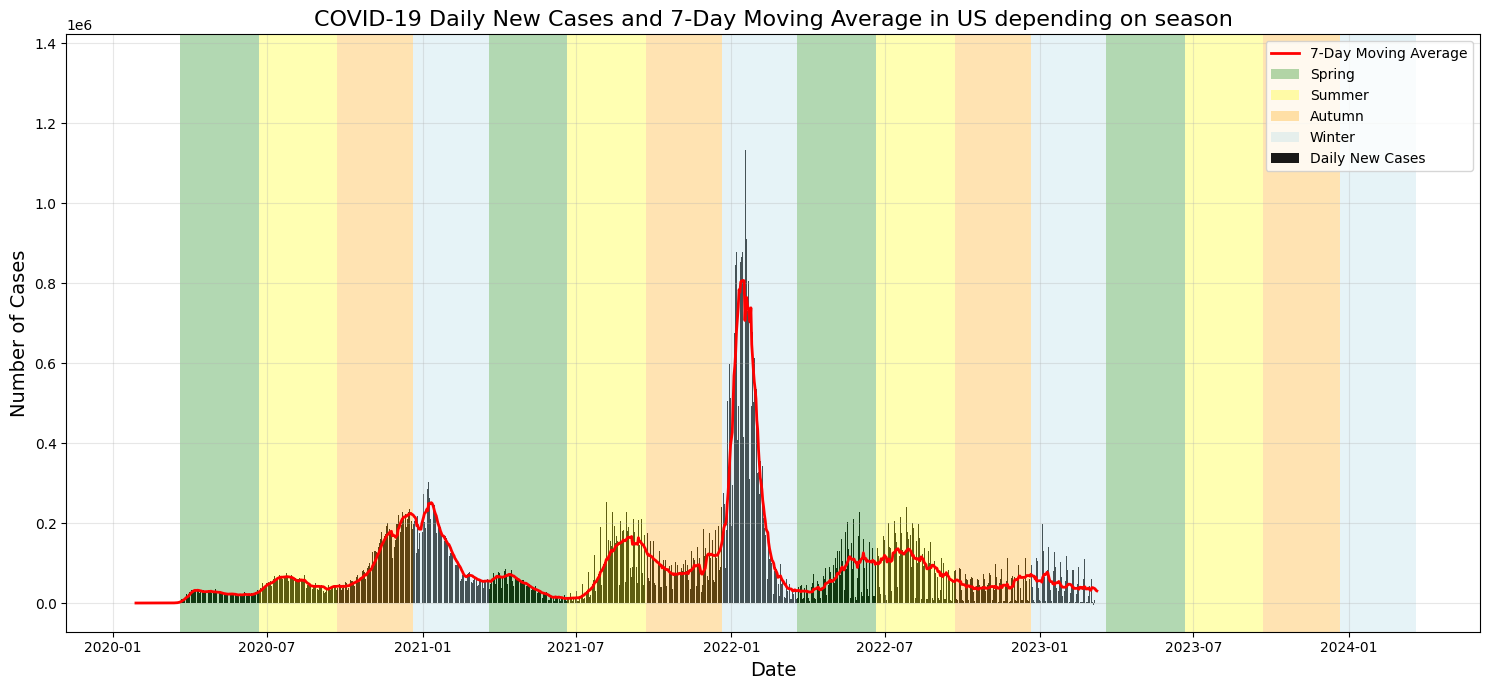

In [63]:
country = 'US'
country_data = melted_df[melted_df['Country/Region'] == country]
daily_totals = country_data.groupby('Date')['Confirmed'].sum().reset_index()
daily_totals['New Cases'] = daily_totals['Confirmed'].diff().fillna(0)
daily_totals['7 Day Moving Average'] = daily_totals['New Cases'].rolling(window = 7).mean()

plt.figure(figsize=(15, 7))

plt.bar(
    daily_totals['Date'],
    daily_totals['New Cases'],
    alpha=0.9,
    color='black',
    label='Daily New Cases'
)

plt.plot(
    daily_totals['Date'],
    daily_totals['7 Day Moving Average'],
    color='red',
    linewidth=2,
    label='7-Day Moving Average'
)

# Add title, labels, and legend
plt.title(f'COVID-19 Daily New Cases and 7-Day Moving Average in {country} depending on season', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(True, alpha=0.3)


# Highlight seasons using axvspan

for year in daily_totals['Date'].dt.year.unique():
    spring_start = pd.Timestamp(year, 3, 20)
    summer_start = pd.Timestamp(year, 6, 21)
    autumn_start = pd.Timestamp(year, 9, 22)
    winter_start = pd.Timestamp(year, 12, 21)

    plt.axvspan(spring_start, summer_start, facecolor='green', alpha=0.3, label='Spring' if year == daily_totals['Date'].dt.year.iloc[0] else None)  # Only label Spring in the first year
    plt.axvspan(summer_start, autumn_start, facecolor='yellow', alpha=0.3, label='Summer' if year == daily_totals['Date'].dt.year.iloc[0] else None)
    plt.axvspan(autumn_start, winter_start, facecolor='orange', alpha=0.3, label='Autumn' if year == daily_totals['Date'].dt.year.iloc[0] else None)
    plt.axvspan(winter_start, pd.Timestamp(year + 1, 3, 20), facecolor='lightblue', alpha=0.3, label='Winter' if year == daily_totals['Date'].dt.year.iloc[0] else None)


plt.legend()
plt.tight_layout()
plt.show()



# **5. Geographic vizualization interactive chart**

In [67]:
# Import plotly for interactive maps
import plotly.express as px

# Choose a specific date for the map
specific_date = '2/20/22'

# Get data for that date
date_df = df.copy()
date_df['Total_Cases'] = df[specific_date]  # Extract cases for the specific date

# Create a choropleth map
fig = px.choropleth(
    date_df,                     # Data source
    locations="Country/Region",  # Column with country names
    locationmode="country names",# How to match country names
    color="Total_Cases",         # Column determining color
    hover_name="Country/Region", # Text shown on hover
    color_continuous_scale="Viridis",  # Color scale
    title=f"Global COVID-19 Confirmed Cases ({specific_date})"  # Map title
)

# Display the map
fig.show()

# **6. T**